# import

In [2]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

In [3]:
N_var = 8

# Построение портрета математического маятника

## Cистем дифф. ур. мат.  маятника
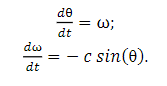

In [4]:
def ode(y, t, c): 
    theta, omega = y 
    dydt = [omega, - c*np.sin(theta)] 
    return dydt

## Моделирование дфф. ур.

In [5]:
def calcODE(args, y0, dy0, ts = 10, nt = 101): 
    y0 = [y0, dy0] 
    t = np.linspace(0, ts, nt) 
    sol = odeint(ode, y0, t, args) 
    return sol

### Построение  фазового  портрета 

In [6]:
def drawPhasePortrait(
        args, 
        deltaX = 1, 
        deltaDX = 1, 
        startX = 0,  
        stopX = 5, 
        startDX = 0, 
        stopDX = 5, 
        ts = 10, 
        nt = 101
    ): 
    for y0 in range(startX, stopX, deltaX): 
            for dy0 in range(startDX, stopDX, deltaDX): 
                sol = calcODE(args, y0, dy0, ts, nt) 
                plt.plot(sol[:, 0], sol[:, 1], 'b') 
    plt.xlabel('x') 
    plt.ylabel('dx/dt') 
    plt.grid() 
    plt.show()

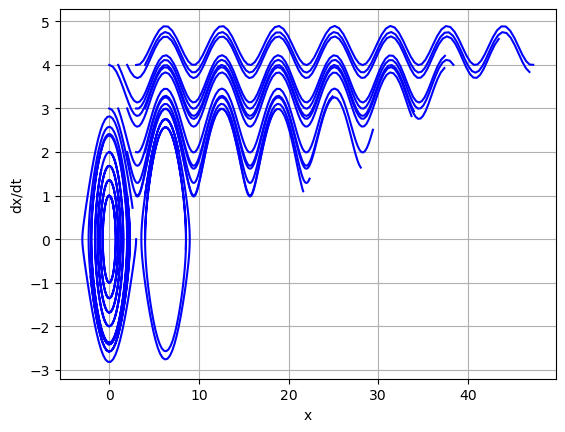

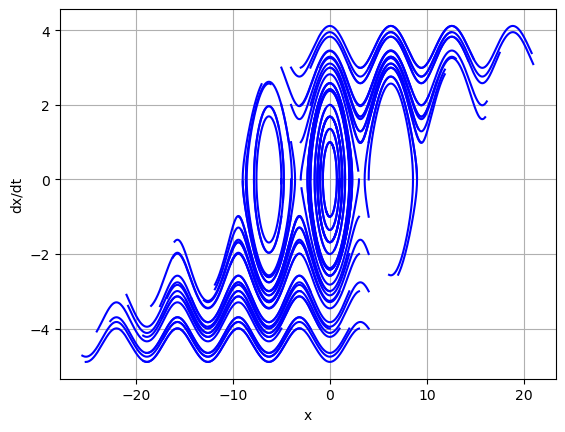

In [7]:
c = 2 # Параметр ОДУ (длина маятника)  
args=(c, ) 
drawPhasePortrait(args) 
drawPhasePortrait(args,  1,  1,  -5,  5,  -4,  4,  ts  =  5,  nt  = 
301)

## Cистем дифф. ур. мат. маятника с трением
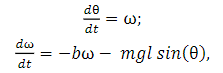

In [8]:
m = 0.2 * N_var 
l= 5 / N_var
b = 0.1 + 0.015 * N_var

In [9]:
def ode(Y, t, b): 
    theta, omega = Y
    dydt = [-b*omega, - m*10*l*np.sin(theta)] 
    return dydt

### Построение  фазового  портрета 

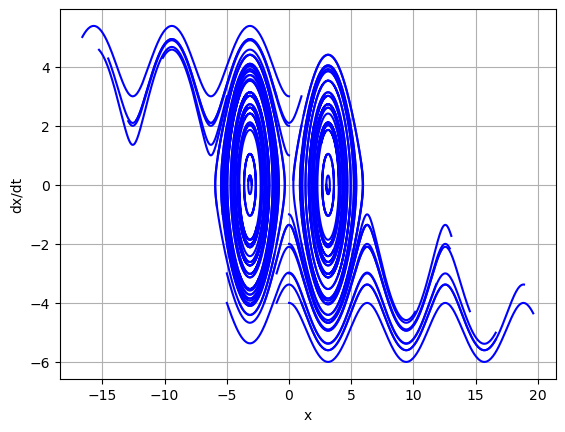

In [15]:
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 2, nt = 301) 

# Построение фазового  портрета  системы
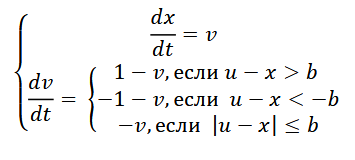

In [57]:
b_ = 0.2*N_var+0.2

In [70]:
def ode(Y, t, b): 
    x, v = Y
    dxdt = [v, 
            (1-v)*((b-x)>b_) +\
            (-1-v)*((b-x)<-b_) +\
            (-v)*(abs(b-x)<=b_)
            ] 
    return dxdt

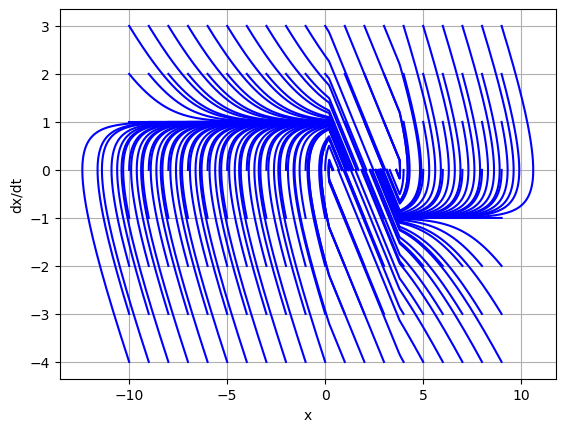

In [73]:
drawPhasePortrait(args, 1, 1, -10, 10, -4, 4, ts = 10, nt = 501) 

# Построение фазового портрета осциллятора Ван дер Поля.

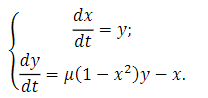

In [216]:
u = None

In [203]:
def ode(Y, t, b): 
    x, y = Y
    dydt = [y, u * (1 - x**2) * y -x] 
    return dydt

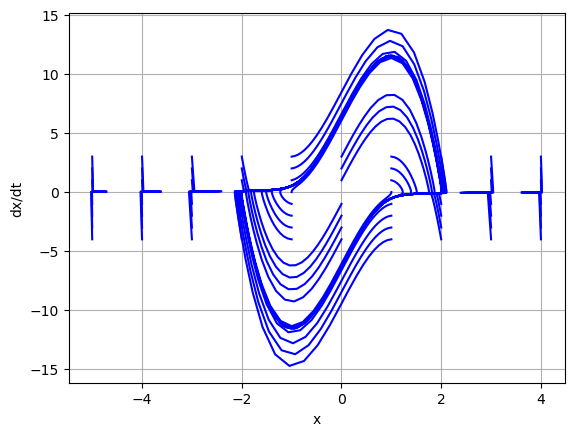

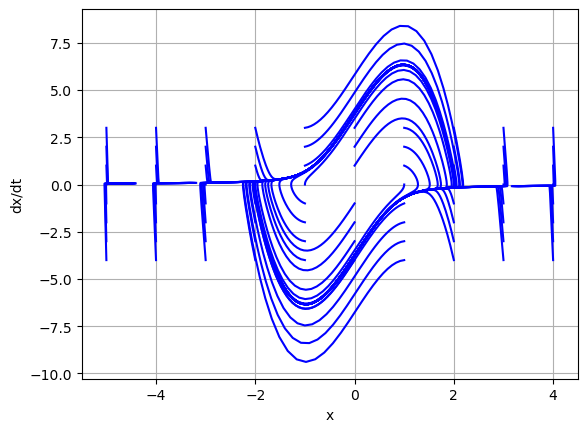

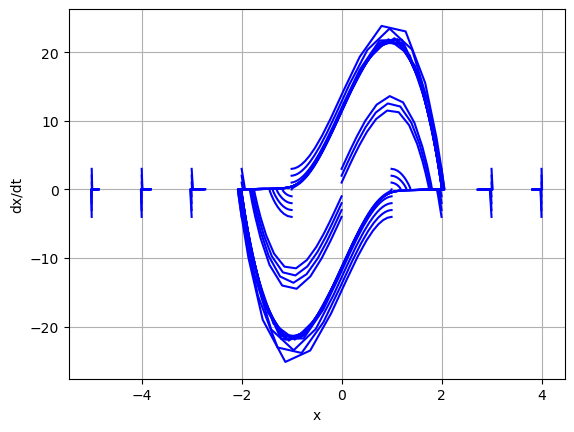

In [219]:
u = 8
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 10, nt = 501) 
u = 4
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 10, nt = 501) 
u = 16
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 10, nt = 501) 


# Построение фазового портрета аттрактора Лоренца.

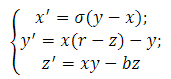

In [220]:
from mpl_toolkits.mplot3d import Axes3D

In [221]:
def ode(y, t, sigma, r, b): 
    x,y,z = y 
    dxdt = sigma * (y-x) 
    dydt = x * (r - z) - y 
    dzdt = x*y - b*z 
    return [dxdt, dydt, dzdt]

In [222]:
def calcODE(args, x, y, z, ts = 10, nt = 101): 
    y0 = [x, y, z] 
    t = np.linspace(0, ts, nt) 
    sol = odeint(ode, y0, t, args) 
    return sol 

In [226]:
def drawPhasePortrait3D(args,  
                        deltaX = 1, deltaY = 1, deltaZ = 1,  
                        startX = 0,  stopX = 5,  
                        startY = 0, stopY = 5,  
                        startZ = 0, stopZ = 5,  
                        ts = 10, nt = 101): 
    fig = plt.figure(figsize=(8, 6)) 
    ax = fig.add_subplot(2, 2, 1, projection='3d') 
    ax.set_title("3D") 
    plt.subplot(2, 2, 2) 
    plt.title("X-Y") 
    plt.grid() 
    plt.subplot(2, 2, 3) 
    plt.title("X-Z") 
    plt.grid() 
    plt.subplot(2, 2, 4) 
    plt.title("Y-Z") 
    plt.grid() 
     
    for x in range(startX, stopX, deltaX): 
        for y in range(startY, stopY, deltaY): 
                for z in range(startZ, stopZ, deltaZ): 
                    sol = calcODE(args, x, y, z, ts, nt) 
 
                    ax.plot(sol[:, 0], sol[:, 1], sol[:, 2]) 
                    plt.subplot(2, 2, 2) 
                    plt.plot(sol[:, 0], sol[:, 1]) 
                    plt.subplot(2, 2, 3) 
                    plt.plot(sol[:, 0], sol[:, 2]) 
                    plt.subplot(2, 2, 4) 
                    plt.plot(sol[:, 1], sol[:, 2]) 
    plt.show()

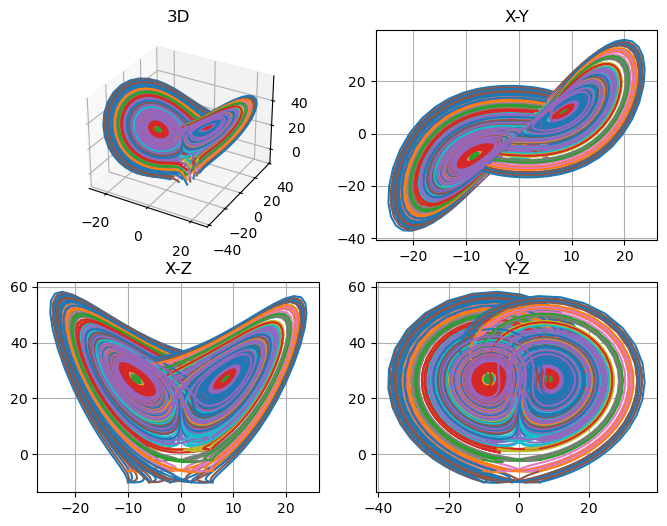

In [227]:
sigma = 10 
r = 28 
b = 8/3 
args=(sigma, r, b) 
drawPhasePortrait3D(args,  
                        deltaX = 4, deltaY = 4, deltaZ = 4,  
                        startX = -10,  stopX = 10, 
                        startY = -10, stopY = 10,  
                        startZ = -10, stopZ = 10,  
                        ts = 10, nt = 1001) 

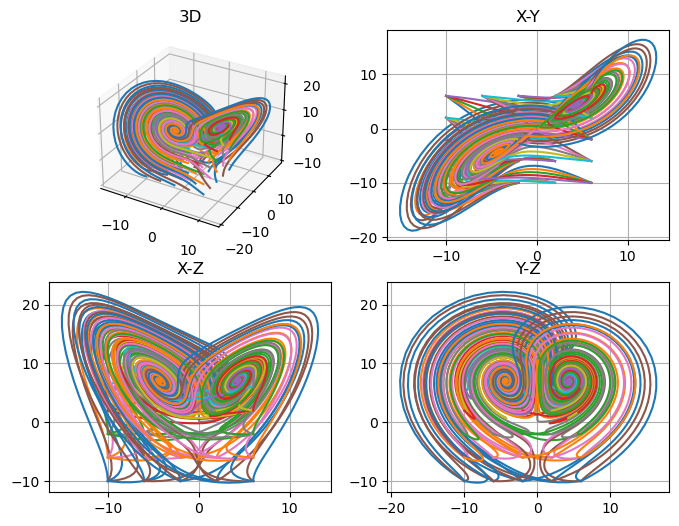

In [229]:
sigma = 10 
r = 8
b = 8/3 
args=(sigma, r, b) 
drawPhasePortrait3D(args,  
                        deltaX = 4, deltaY = 4, deltaZ = 4,  
                        startX = -10,  stopX = 10, 
                        startY = -10, stopY = 10,  
                        startZ = -10, stopZ = 10,  
                        ts = 10, nt = 1001) 

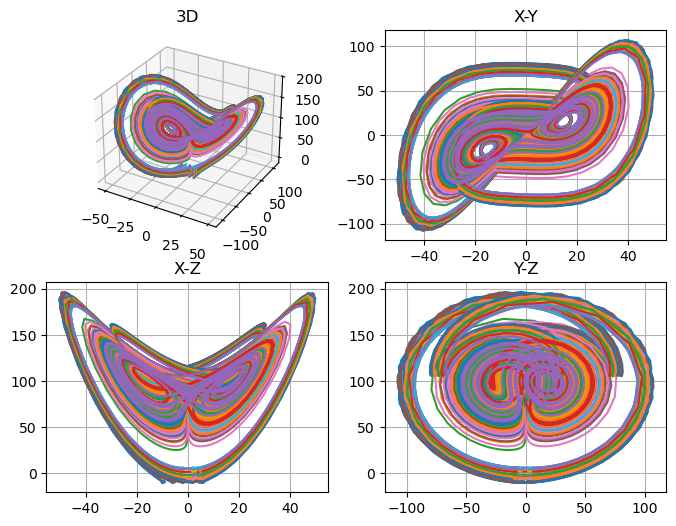

In [230]:
sigma = 10 
r = 100
b = 8/3 
args=(sigma, r, b) 
drawPhasePortrait3D(args,  
                        deltaX = 4, deltaY = 4, deltaZ = 4,  
                        startX = -10,  stopX = 10, 
                        startY = -10, stopY = 10,  
                        startZ = -10, stopZ = 10,  
                        ts = 10, nt = 1001) 